# Importação das libs

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.float_format = '{:.2f}'.format

# Leitura da fonte de dados

In [2]:
df = pd.read_csv('https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv')

In [3]:
df.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Valor      10008 non-null  object
dtypes: int64(4), object(4)
memory usage: 625.6+ KB


# Área média de todos os imóveis (M²)

In [5]:
df['Metragem'].mean()

442.30065947242207

# Área média dos imóveis da Vila Mariana

In [6]:
df[df['Bairro'] == 'Vila Mariana']['Metragem'].mean()

233.6195652173913

# Contagem dos Imóveis por Bairro

In [7]:
n_imoveis_bairro = df['Bairro'].value_counts()

# Os dez bairros com mais imóveis

<AxesSubplot:>

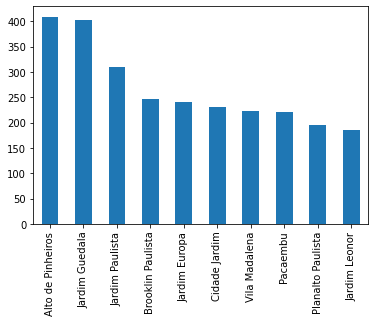

In [8]:
n_imoveis_bairro.head(10).plot.bar()

# Tratamento do campo 'Valor'

In [9]:
df['Valor'][0]

'R$ 7.000.000'

In [10]:
df['Valor'][0].split()

['R$', '7.000.000']

In [11]:
# visualizando uma amostra, percebe-se a existência de outros padrões no campo 'Valor'
df.sample(10)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
2189,NaN,Vila Tramontano,São Paulo,1305,6,8,9,R$ 35.000\n /Mês
198,"Rua Bolívia, 200",Jardim América,São Paulo,1060,4,5,9,R$ 11.489.000
8465,NaN,Planalto Paulista,São Paulo,224,3,5,4,R$ 1.648.000
160,NaN,Vila Mariana,São Paulo,228,4,5,3,R$ 2.200.000
8044,Rua Doutor Francisco Malta Cardoso,Jardim Cordeiro,São Paulo,312,3,4,3,R$ 2.800.000
7581,NaN,Vila Gumercindo,São Paulo,211,3,1,2,R$ 1.000.000
4656,Rua Gama Lobo,Vila Dom Pedro I,São Paulo,198,5,2,1,R$ 640.000
8857,"Rua Pedro Nascimento Ferrador, 483",Vila Prudente,São Paulo,130,3,3,2,R$ 760.000
5519,Rua Martins,Butantã,São Paulo,329,4,2,5,R$ 1.500.000
7138,"Rua Alessandro Araldi, 109",Jardim dos Pinheiros,São Paulo,179,3,4,3,R$ 820.000


In [12]:
# o parâmetro 'expand' o método 'split' permite obter um DataFrame
df['Valor'].str.split(expand=True)

,0,1,2
0,R$,7.000.000,None
1,R$,3.700.000,None
2,R$,380.000,None
3,R$,685.000,None
4,R$,540.000,None
...,...,...,...
10003,R$,665.000,None
10004,R$,2.300.000,None
10005,R$,1.050.000,None
10006,R$,2.200,/Mês


In [13]:
# Verificar se o primeiro pedaço do conteúdo é mesmo apenas "R$"
df['Valor'].str.split(expand=True)[0].unique()

array(['R$'], dtype=object)

In [14]:
# Verificar se o segundo pedaço contém valores
df['Valor'].str.split(expand=True)[1].unique()

array(['7.000.000', '3.700.000', '380.000', ..., '553.000', '951.000',
       '2.200'], dtype=object)

In [15]:
# Verificar o terceiro pedaço
df['Valor'].str.split(expand=True)[2].unique()

array([None, '/Mês', '/Ano', '/Dia'], dtype=object)

In [16]:
# criação das colunas que receberão os valores divididos
df[['Moeda', 'valor_anuncio', 'tipo_anuncio']] = df['Valor'].str.split(expand=True)

In [17]:
df.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,valor_anuncio,tipo_anuncio
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None


In [18]:
# Filtro para desconsiderar as linhas cujo campo 'tipo_anuncio' não é None (imóveis possivelmente ofertados para aluguel)
df = df[df['tipo_anuncio'].isnull()]
df.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,valor_anuncio,tipo_anuncio
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9156 entries, 0 to 10007
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rua            6107 non-null   object
 1   Bairro         9146 non-null   object
 2   Cidade         9156 non-null   object
 3   Metragem       9156 non-null   int64 
 4   Quartos        9156 non-null   int64 
 5   Banheiros      9156 non-null   int64 
 6   Vagas          9156 non-null   int64 
 7   Valor          9156 non-null   object
 8   Moeda          9156 non-null   object
 9   valor_anuncio  9156 non-null   object
 10  tipo_anuncio   0 non-null      object
dtypes: int64(4), object(7)
memory usage: 858.4+ KB


In [20]:
# conversão do 'valor_anuncio' para float
df['valor_anuncio'] = df['valor_anuncio'].str.replace('.', '').astype(float)

/tmp/ipykernel_26404/2594533398.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['valor_anuncio'] = df['valor_anuncio'].str.replace('.', '').astype(float)


In [21]:
# Exclusão de colunas
df = df.drop(['Valor', 'Moeda', 'tipo_anuncio'], axis=1)

# Verificação dos tipos de dados

In [22]:
df.dtypes

Rua               object
Bairro            object
Cidade            object
Metragem           int64
Quartos            int64
Banheiros          int64
Vagas              int64
valor_anuncio    float64
dtype: object

# Desafios
## 1 - Realizar a média da metragem para cada um dos bairros (Paulo)

In [23]:
df[['Bairro', 'Metragem']].groupby('Bairro').mean().reset_index().sort_values(by='Metragem', ascending=False)

,Bairro,Metragem
424,Sítio Represa,37000.00
485,Vila Castelo,2850.00
168,Jardim Guedala,2754.14
307,Jardim das Camélias,1700.00
40,Chácara Flora,1251.44
...,...,...
53,Cidade Antônio Estevão de Carvalho,57.50
213,Jardim Nova Germania,57.00
114,Jardim Benfica,48.00
557,Vila Leonor,46.00


## 2 - Duas formas de selecionar os dados por bairro (consultar os métodos na documentação do pandas) (Thiago)

In [24]:
# Forma 1:
df[df['Bairro'] == 'Tatuapé']

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,valor_anuncio
164,"Estrada Velha da Penha, 120",Tatuapé,São Paulo,110,2,1,2,450000.00
323,Rua Professora Sebastiana Silva Minhoto,Tatuapé,São Paulo,147,2,3,3,690000.00
2076,Praça Louveira,Tatuapé,São Paulo,250,4,2,3,1350000.00
2179,Praça Louveira,Tatuapé,São Paulo,255,4,2,3,1350000.00
2429,"Rua Ulisses Cruz, 106",Tatuapé,São Paulo,117,2,1,1,495000.00
3072,Rua Professor Carlos Zagotis,Tatuapé,São Paulo,200,3,3,2,950000.00
3867,"Rua Aiarani, 24",Tatuapé,São Paulo,80,2,2,1,380000.00
4029,NaN,Tatuapé,São Paulo,220,4,3,2,885000.00
4285,Rua Gonçalves CreSão Pauloo,Tatuapé,São Paulo,220,3,1,4,1250000.00
5049,"Rua Perucaba, 153",Tatuapé,São Paulo,290,2,3,5,1700000.00


In [25]:
# Forma 2:
df.query("Bairro == 'Tatuapé'")

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,valor_anuncio
164,"Estrada Velha da Penha, 120",Tatuapé,São Paulo,110,2,1,2,450000.00
323,Rua Professora Sebastiana Silva Minhoto,Tatuapé,São Paulo,147,2,3,3,690000.00
2076,Praça Louveira,Tatuapé,São Paulo,250,4,2,3,1350000.00
2179,Praça Louveira,Tatuapé,São Paulo,255,4,2,3,1350000.00
2429,"Rua Ulisses Cruz, 106",Tatuapé,São Paulo,117,2,1,1,495000.00
3072,Rua Professor Carlos Zagotis,Tatuapé,São Paulo,200,3,3,2,950000.00
3867,"Rua Aiarani, 24",Tatuapé,São Paulo,80,2,2,1,380000.00
4029,NaN,Tatuapé,São Paulo,220,4,3,2,885000.00
4285,Rua Gonçalves CreSão Pauloo,Tatuapé,São Paulo,220,3,1,4,1250000.00
5049,"Rua Perucaba, 153",Tatuapé,São Paulo,290,2,3,5,1700000.00


## 3 - Explorar alguns gráficos na documentação e aplicar nas demais colunas do DF, tentar colocar alguma conclusão. (Thiago)


### Contagem de imóveis por número de quartos
A maioria dos imóveis possui 3 e 4 quartos

<AxesSubplot:>

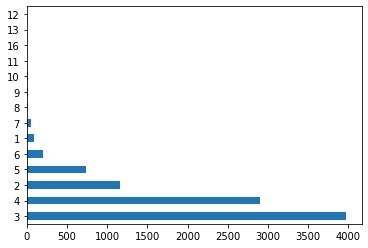

In [26]:
df['Quartos'].value_counts().plot.barh()

### Distribuição dos Valores
A maioria dos imóveis está abaixo de 10 Mi

<AxesSubplot:ylabel='Frequency'>

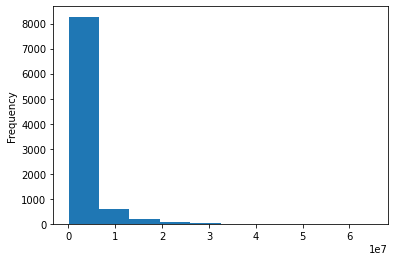

In [27]:
df['valor_anuncio'].plot.hist()

### Contagem de imóveis por Quantidade de Vagas
Há mais imóveis com duas ou mais vagas do que com apenas uma

<AxesSubplot:>

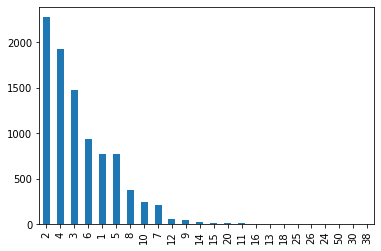

In [28]:
df['Vagas'].value_counts().plot.bar()

### Histogramas sobrepostos (Qtd de Banheiros e Quartos)
Cerca de 3 mil imóveis possuem pelo menos 5 banheiros

<AxesSubplot:ylabel='Frequency'>

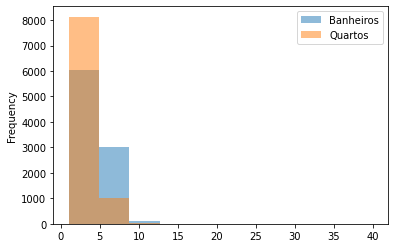

In [29]:
df[['Banheiros', 'Quartos']].plot.hist(alpha=0.5)

## 4 - Pegar outras estatísticas dos dados: média, mediana, min, max. (Vivi)


In [30]:
df.describe()

,Metragem,Quartos,Banheiros,Vagas,valor_anuncio
count,9156.00,9156.00,9156.00,9156.00,9156.00
mean,434.42,3.45,3.80,3.96,3052202.96
std,7856.42,1.05,1.97,2.60,3944208.19
min,10.00,1.00,1.00,1.00,13000.00
25%,168.00,3.00,2.00,2.00,890000.00
50%,276.00,3.00,4.00,4.00,1800000.00
75%,450.00,4.00,5.00,5.00,3500000.00
max,750000.00,16.00,40.00,50.00,65000000.00


## 5 - Descobrir quais são os bairros que não têm nome de rua. (Vivi)
Os 10 Bairros com mais imóveis que não possuem dado de Rua

In [31]:
df[df['Rua'].isna()]['Bairro'].value_counts().head(10)

Jardim Guedala       156
Alto de Pinheiros    151
Jardim Paulista      126
Jardim Europa        107
Jardim Leonor        107
Cidade Jardim         96
Morumbi               77
Vila Madalena         69
Brooklin Paulista     66
Jardim América        64
Name: Bairro, dtype: int64

# Aula 02

In [32]:
df.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,valor_anuncio
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000.00
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3700000.00
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380000.00
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,685000.00
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540000.00


In [33]:
df.describe()

,Metragem,Quartos,Banheiros,Vagas,valor_anuncio
count,9156.00,9156.00,9156.00,9156.00,9156.00
mean,434.42,3.45,3.80,3.96,3052202.96
std,7856.42,1.05,1.97,2.60,3944208.19
min,10.00,1.00,1.00,1.00,13000.00
25%,168.00,3.00,2.00,2.00,890000.00
50%,276.00,3.00,4.00,4.00,1800000.00
75%,450.00,4.00,5.00,5.00,3500000.00
max,750000.00,16.00,40.00,50.00,65000000.00


In [34]:
df[['Rua', 'Bairro', 'Cidade']].describe()

,Rua,Bairro,Cidade
count,6107,9146,9156
unique,3006,697,1
top,Rua Alberto Faria,Alto de Pinheiros,São Paulo
freq,24,369,9156


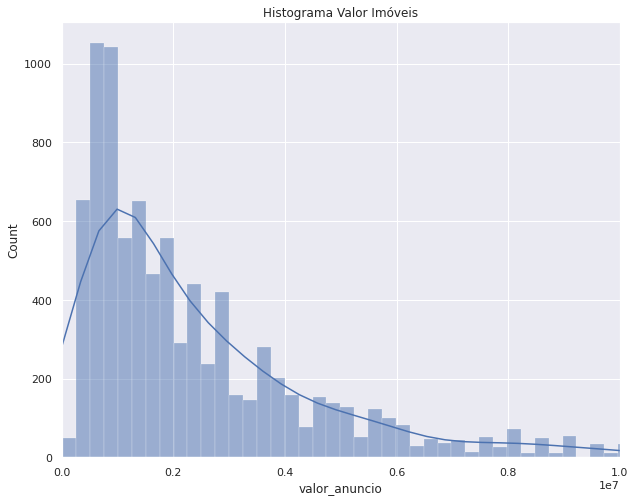

In [35]:
plt.figure(figsize=(10,8))
sns.set()
ax = sns.histplot(data=df['valor_anuncio'], kde=True)
plt.xlim((-50, 10000000))
ax.set_title('Histograma Valor Imóveis');

# Desafios
## Criar uma escala de valores em milhões

In [36]:
df['valor_anuncio_mi'] = df['valor_anuncio']/1000000
df.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,valor_anuncio,valor_anuncio_mi
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000.00,7.00
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3700000.00,3.70
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380000.00,0.38
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,685000.00,0.69
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540000.00,0.54


## Deixar o gráfico do histogrma de valores legível (alterar as labels, cores, escala, etc.)

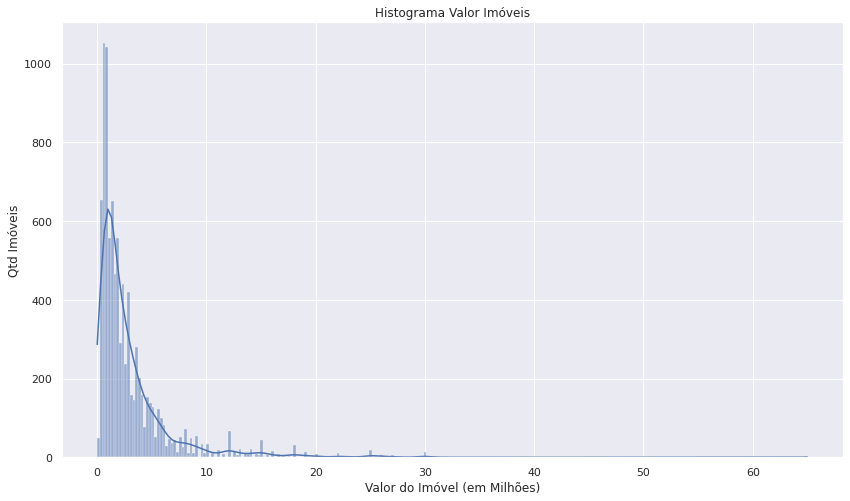

In [37]:
plt.figure(figsize=(14, 8))
# plt.style.use('bmh')
sns.set()
ax = sns.histplot(df, x='valor_anuncio_mi', kde=True)
ax.set_xlabel("Valor do Imóvel (em Milhões)")
ax.set_ylabel("Qtd Imóveis")
ax.set_title("Histograma Valor Imóveis");

## Preço do metro quadrado por bairro e plotar em gráfico ideal

In [38]:
df['valor_m2'] = df['valor_anuncio'] / df['Metragem']

In [39]:
caros = df[['Bairro', 'valor_m2']].groupby('Bairro').mean().reset_index().sort_values(by='valor_m2', ascending=False).head(20)
baratos = df[['Bairro', 'valor_m2']].groupby('Bairro').mean().reset_index().sort_values(by='valor_m2', ascending=False).tail(20)

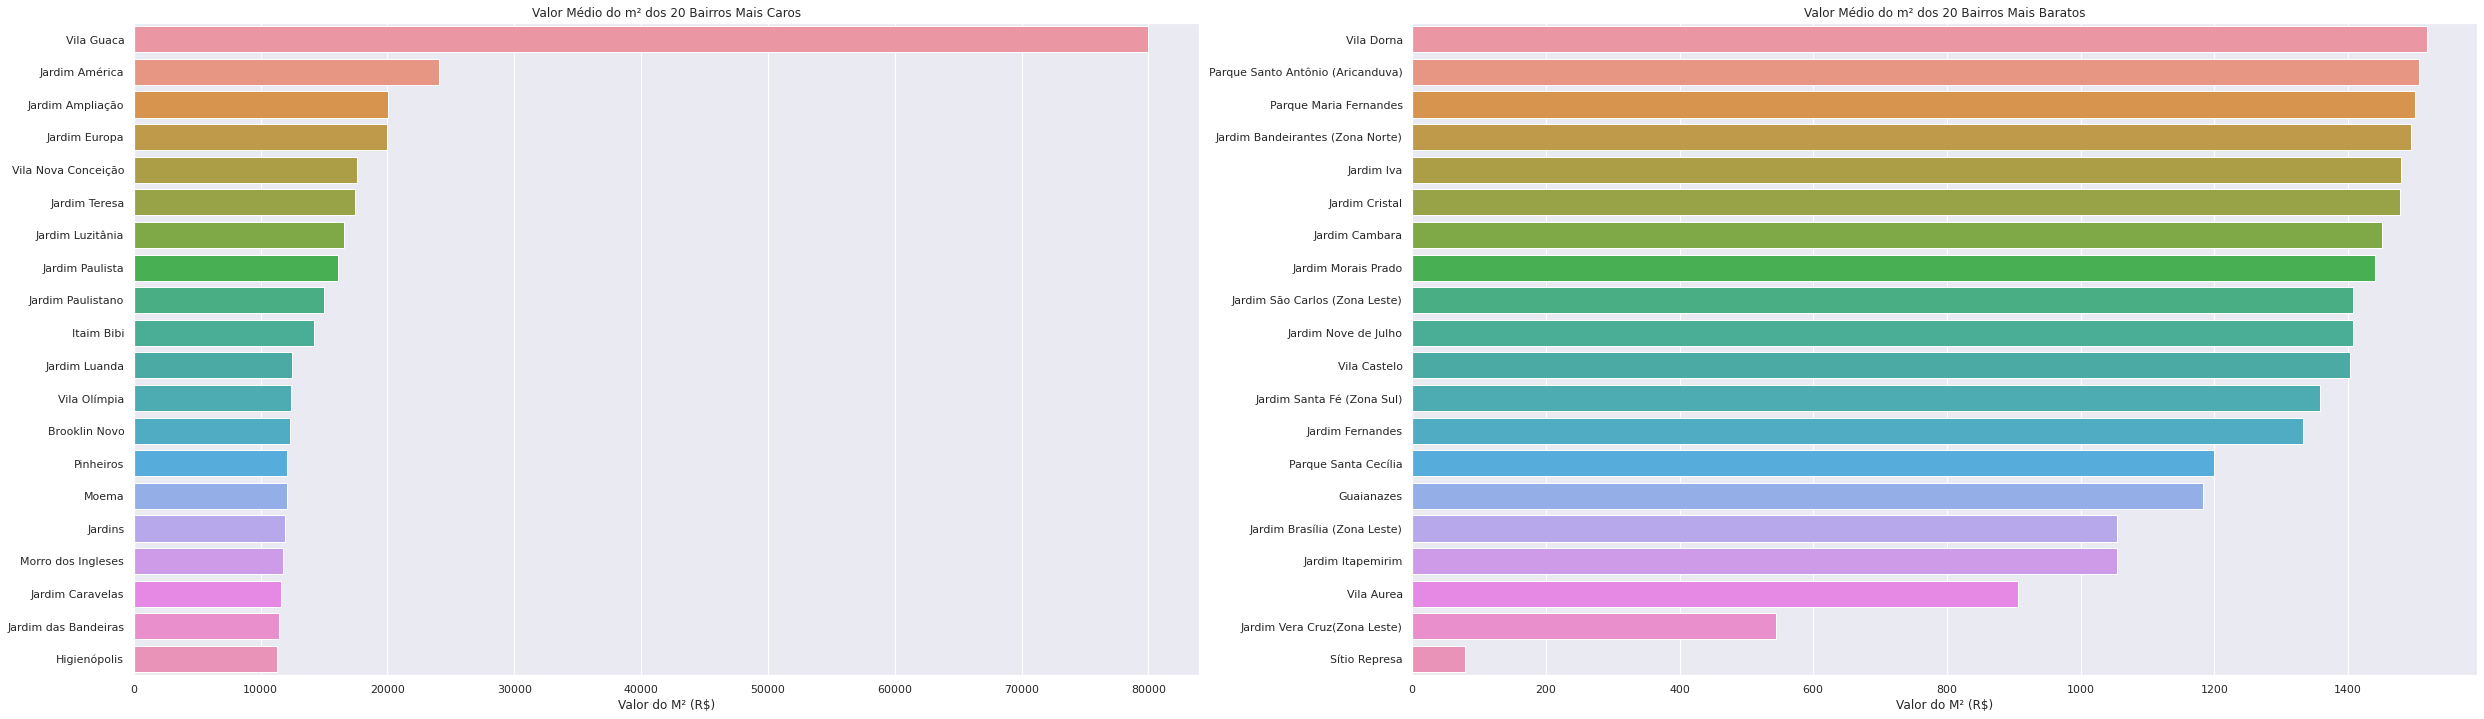

In [40]:
plt.figure(figsize=(42, 12))
plt.subplot(1, 2, 1)
ax = sns.barplot(y='Bairro', x='valor_m2', data=caros)
ax.set_title("Valor Médio do m² dos 20 Bairros Mais Caros")
plt.xlabel("Valor do M² (R$)")
plt.ylabel("")

plt.subplot(1, 2, 2)
ax = sns.barplot(y='Bairro', x='valor_m2', data=baratos)
ax.set_title("Valor Médio do m² dos 20 Bairros Mais Baratos")
plt.xlabel("Valor do M² (R$)")
plt.ylabel("")
plt.show()

## Explorar as bibliotecas de visualizações e colocar as suas conclusões

Cerca de 2/3 dos imóveis têm 3 e 4 quartos, entre 2 e 5 banheiros e entre 2 e 5 vagas


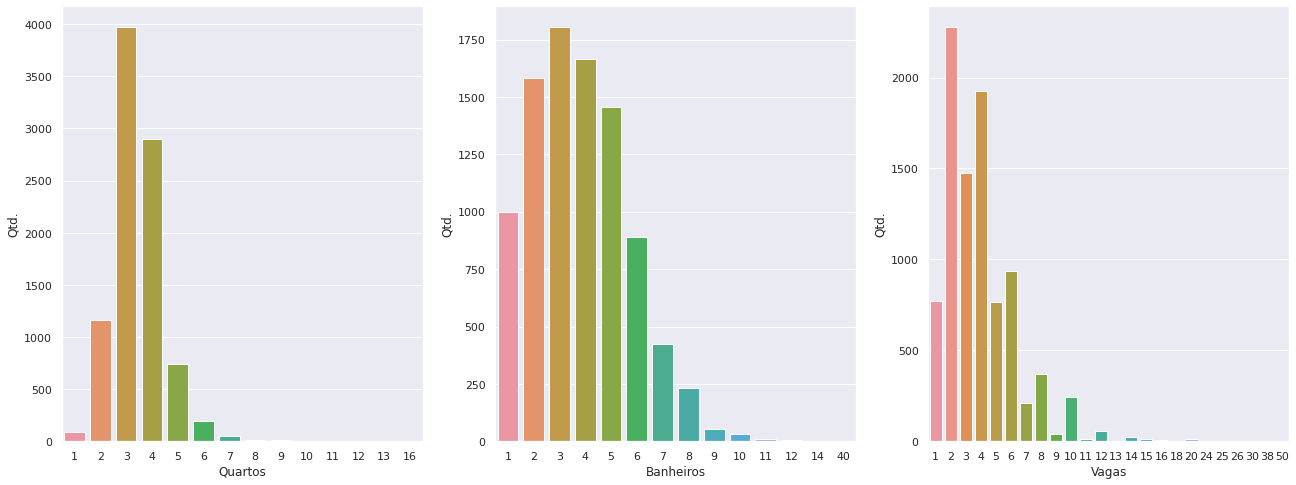

In [41]:
plt.figure(figsize=(22, 8))
plt.subplot(1, 3, 1) # barplot 1 - Quartos
aux1 = df[['Metragem', 'Quartos']].groupby('Quartos').count().reset_index().rename({'Metragem': 'Qtd.'}, axis=1)
sns.barplot(x='Quartos', y='Qtd.', data=aux1)

plt.subplot(1, 3, 2) # barplot 2 - Banheiros
aux2 = df[['Metragem', 'Banheiros']].groupby('Banheiros').count().reset_index().rename({'Metragem': 'Qtd.'}, axis=1)
sns.barplot(x='Banheiros', y='Qtd.', data=aux2)

plt.subplot(1, 3, 3) # barplot 3 - Vagas
aux3 = df[['Metragem', 'Vagas']].groupby('Vagas').count().reset_index().rename({'Metragem': 'Qtd.'}, axis=1)
sns.barplot(x='Vagas', y='Qtd.', data=aux3)
plt.show()

Filtrando os imóveis cuja metragem é inferior a 1000, constata-se a prevalência de imóveis com área de 100 a 400 m²

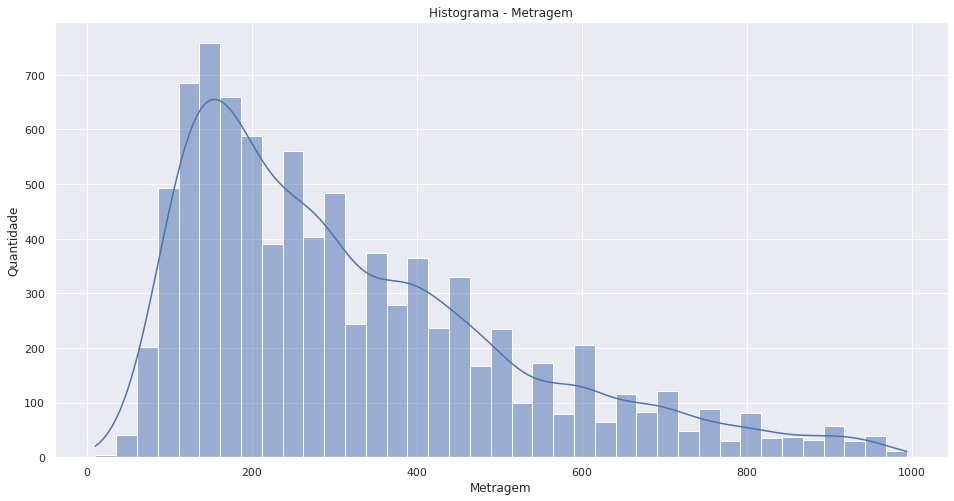

In [42]:
plt.figure(figsize=(16, 8))
ax = sns.histplot(x='Metragem', data=df[df['Metragem'] < 1000], kde=True)
ax.set_title("Histograma - Metragem")
plt.ylabel("Quantidade")
plt.show()

Filtrando os imóveis cuja metragem é inferior a 900, ainda é possível visualizar a existência de outliers

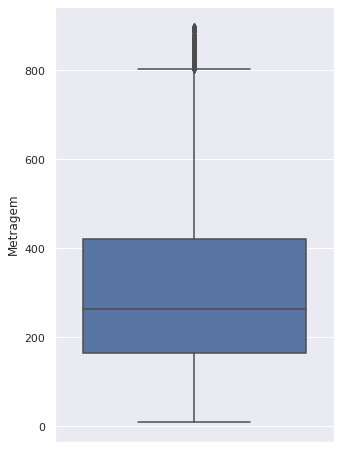

In [43]:
plt.figure(figsize=(5, 8))
ax = sns.boxplot(y='Metragem', data=df[df['Metragem'] < 900])

Embora haja pontos bastante dispersos, é possível visualizar a correlação positiva entre Metragem e Valor Anúncio

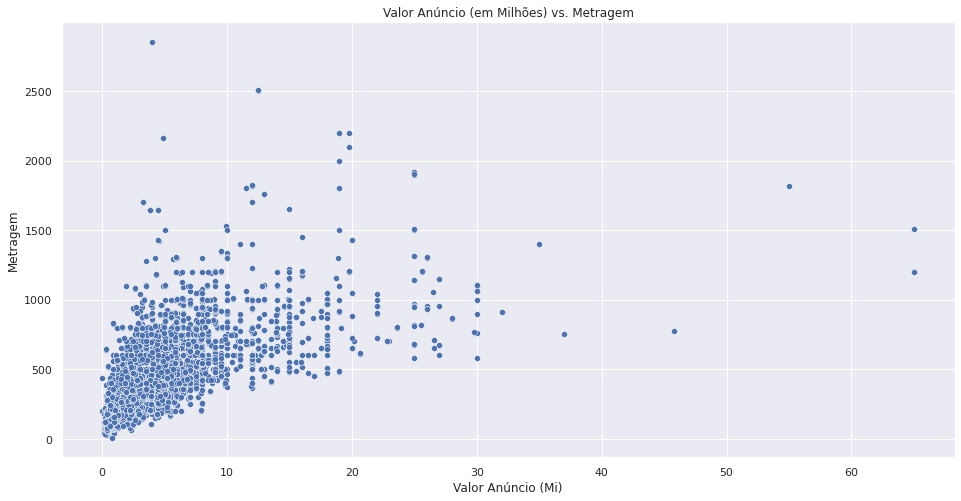

In [44]:
plt.figure(figsize=(16, 8))
ax = sns.scatterplot(x='valor_anuncio_mi', y='Metragem', data=df[df['Metragem'] < 35000])
ax.set_title("Valor Anúncio (em Milhões) vs. Metragem")
plt.xlabel("Valor Anúncio (Mi)")
plt.show()

## Pesquisar uma visualização para analisar as medidas separatrizes, de tendência central e outliers

Text(0, 0.5, 'Valor Anúncio (Mi)')

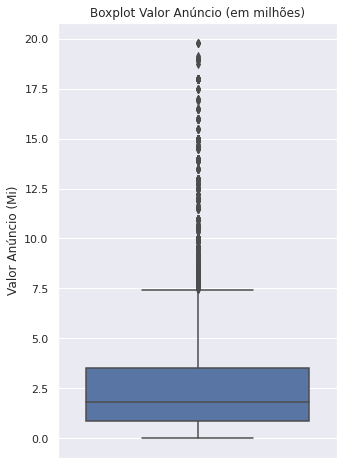

In [45]:
# Para melhor visualizar o gráfico foi necessário eliminar imóveis anunciados por 20 mi ou mais
plt.figure(figsize=(5, 8))
ax = sns.boxplot(y='valor_anuncio_mi', data=df[df['valor_anuncio_mi'] < 20])
plt.title("Boxplot Valor Anúncio (em milhões)")
ax.set_ylabel("Valor Anúncio (Mi)")

# Aula 03

In [46]:
dados_vendas = df.copy()

In [47]:
dados_vendas

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,valor_anuncio,valor_anuncio_mi,valor_m2
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000.00,7.00,7000.00
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3700000.00,3.70,7459.68
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380000.00,0.38,3040.00
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,685000.00,0.69,2209.68
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540000.00,0.54,5400.00
...,...,...,...,...,...,...,...,...,...,...
10002,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,1500000.00,1.50,5617.98
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,665000.00,0.67,7000.00
10004,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,2300000.00,2.30,3801.65
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,1050000.00,1.05,5121.95


In [50]:
dados_vendas.groupby('Bairro').mean()

,Metragem,Quartos,Banheiros,Vagas,valor_anuncio,valor_anuncio_mi,valor_m2
Bairro,,,,,,,
Aclimação,246.16,3.27,3.04,2.91,1763200.01,1.76,7656.17
Alto da Boa Vista,418.88,4.12,5.12,4.62,2391250.00,2.39,5849.57
Alto da Lapa,299.25,3.15,3.85,4.00,2083168.75,2.08,7606.73
Alto da Mooca,270.05,3.30,2.60,3.65,1184170.00,1.18,5691.74
Alto de Pinheiros,429.85,3.94,4.83,4.95,4782698.96,4.78,11269.98
...,...,...,...,...,...,...,...
Vila Água Funda,152.20,2.60,2.20,2.60,652000.00,0.65,4467.13
Água Branca,173.58,3.08,3.25,2.25,1226500.00,1.23,7269.11
Água Fria,165.42,2.83,3.42,2.50,927083.33,0.93,5841.10
